# Árboles de Decisión Random Forest (Clasificación)

## 1. Librerias y configuraciones previas


In [88]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
import math


#creación de modelos
from sklearn.ensemble import RandomForestClassifier


import multiprocessing

#evaluacion de variables
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold
from sklearn.inspection import permutation_importance
from sklearn import metrics

#from sklearn.metrics import accuracy_score

#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report
#
#from sklearn.model_selection import GridSearchCV

#


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [89]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

## 3. Carga del dataset

In [90]:
d=pd.read_csv('./datasets/02_GermanCredit_Prep.csv')

In [91]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [92]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [93]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_account_status   1400 non-null   object
 1   loan_duration_mo          1400 non-null   int64 
 2   credit_history            1400 non-null   object
 3   purpose                   1400 non-null   object
 4   loan_amount               1400 non-null   int64 
 5   savings_account_balance   1400 non-null   object
 6   time_employed_yrs         1400 non-null   object
 7   payment_pcnt_income       1400 non-null   int64 
 8   gender_status             1400 non-null   object
 9   other_signators           1400 non-null   object
 10  time_in_residence         1400 non-null   int64 
 11  property                  1400 non-null   object
 12  age_yrs                   1400 non-null   int64 
 13  other_credit_outstanding  1400 non-null   object
 14  home_ownership          

## 4. Visualización de datos

### Variables de entrada

In [94]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head()

,checking_account_status,credit_history,purpose,savings_account_balance,time_employed_yrs,gender_status,other_signators,property,other_credit_outstanding,home_ownership,job_category,telephone,foreign_worker
0,< 0 DM,critical account - other non-bank loans,radio/television,unknown/none,>= 7 years,male-single,none,real estate,none,own,skilled,yes,yes
1,0 - 200 DM,current loans paid,radio/television,< 100 DM,1 - 4 years,female-divorced/separated/married,none,real estate,none,own,skilled,none,yes
2,none,critical account - other non-bank loans,education,< 100 DM,4 - 7 years,male-single,none,real estate,none,own,unskilled-resident,none,yes
3,< 0 DM,current loans paid,furniture/equipment,< 100 DM,4 - 7 years,male-single,guarantor,building society savings/life insurance,none,for free,skilled,none,yes
4,< 0 DM,past payment delays,car,< 100 DM,1 - 4 years,male-single,none,unknown-none,none,for free,skilled,none,yes


In [95]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

d[numCols].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
0,6,1169,4,4,67,2,1,0
1,48,5951,2,2,22,1,1,1
2,12,2096,2,3,49,1,2,0
3,42,7882,2,4,45,1,2,0
4,24,4870,3,4,53,2,2,1


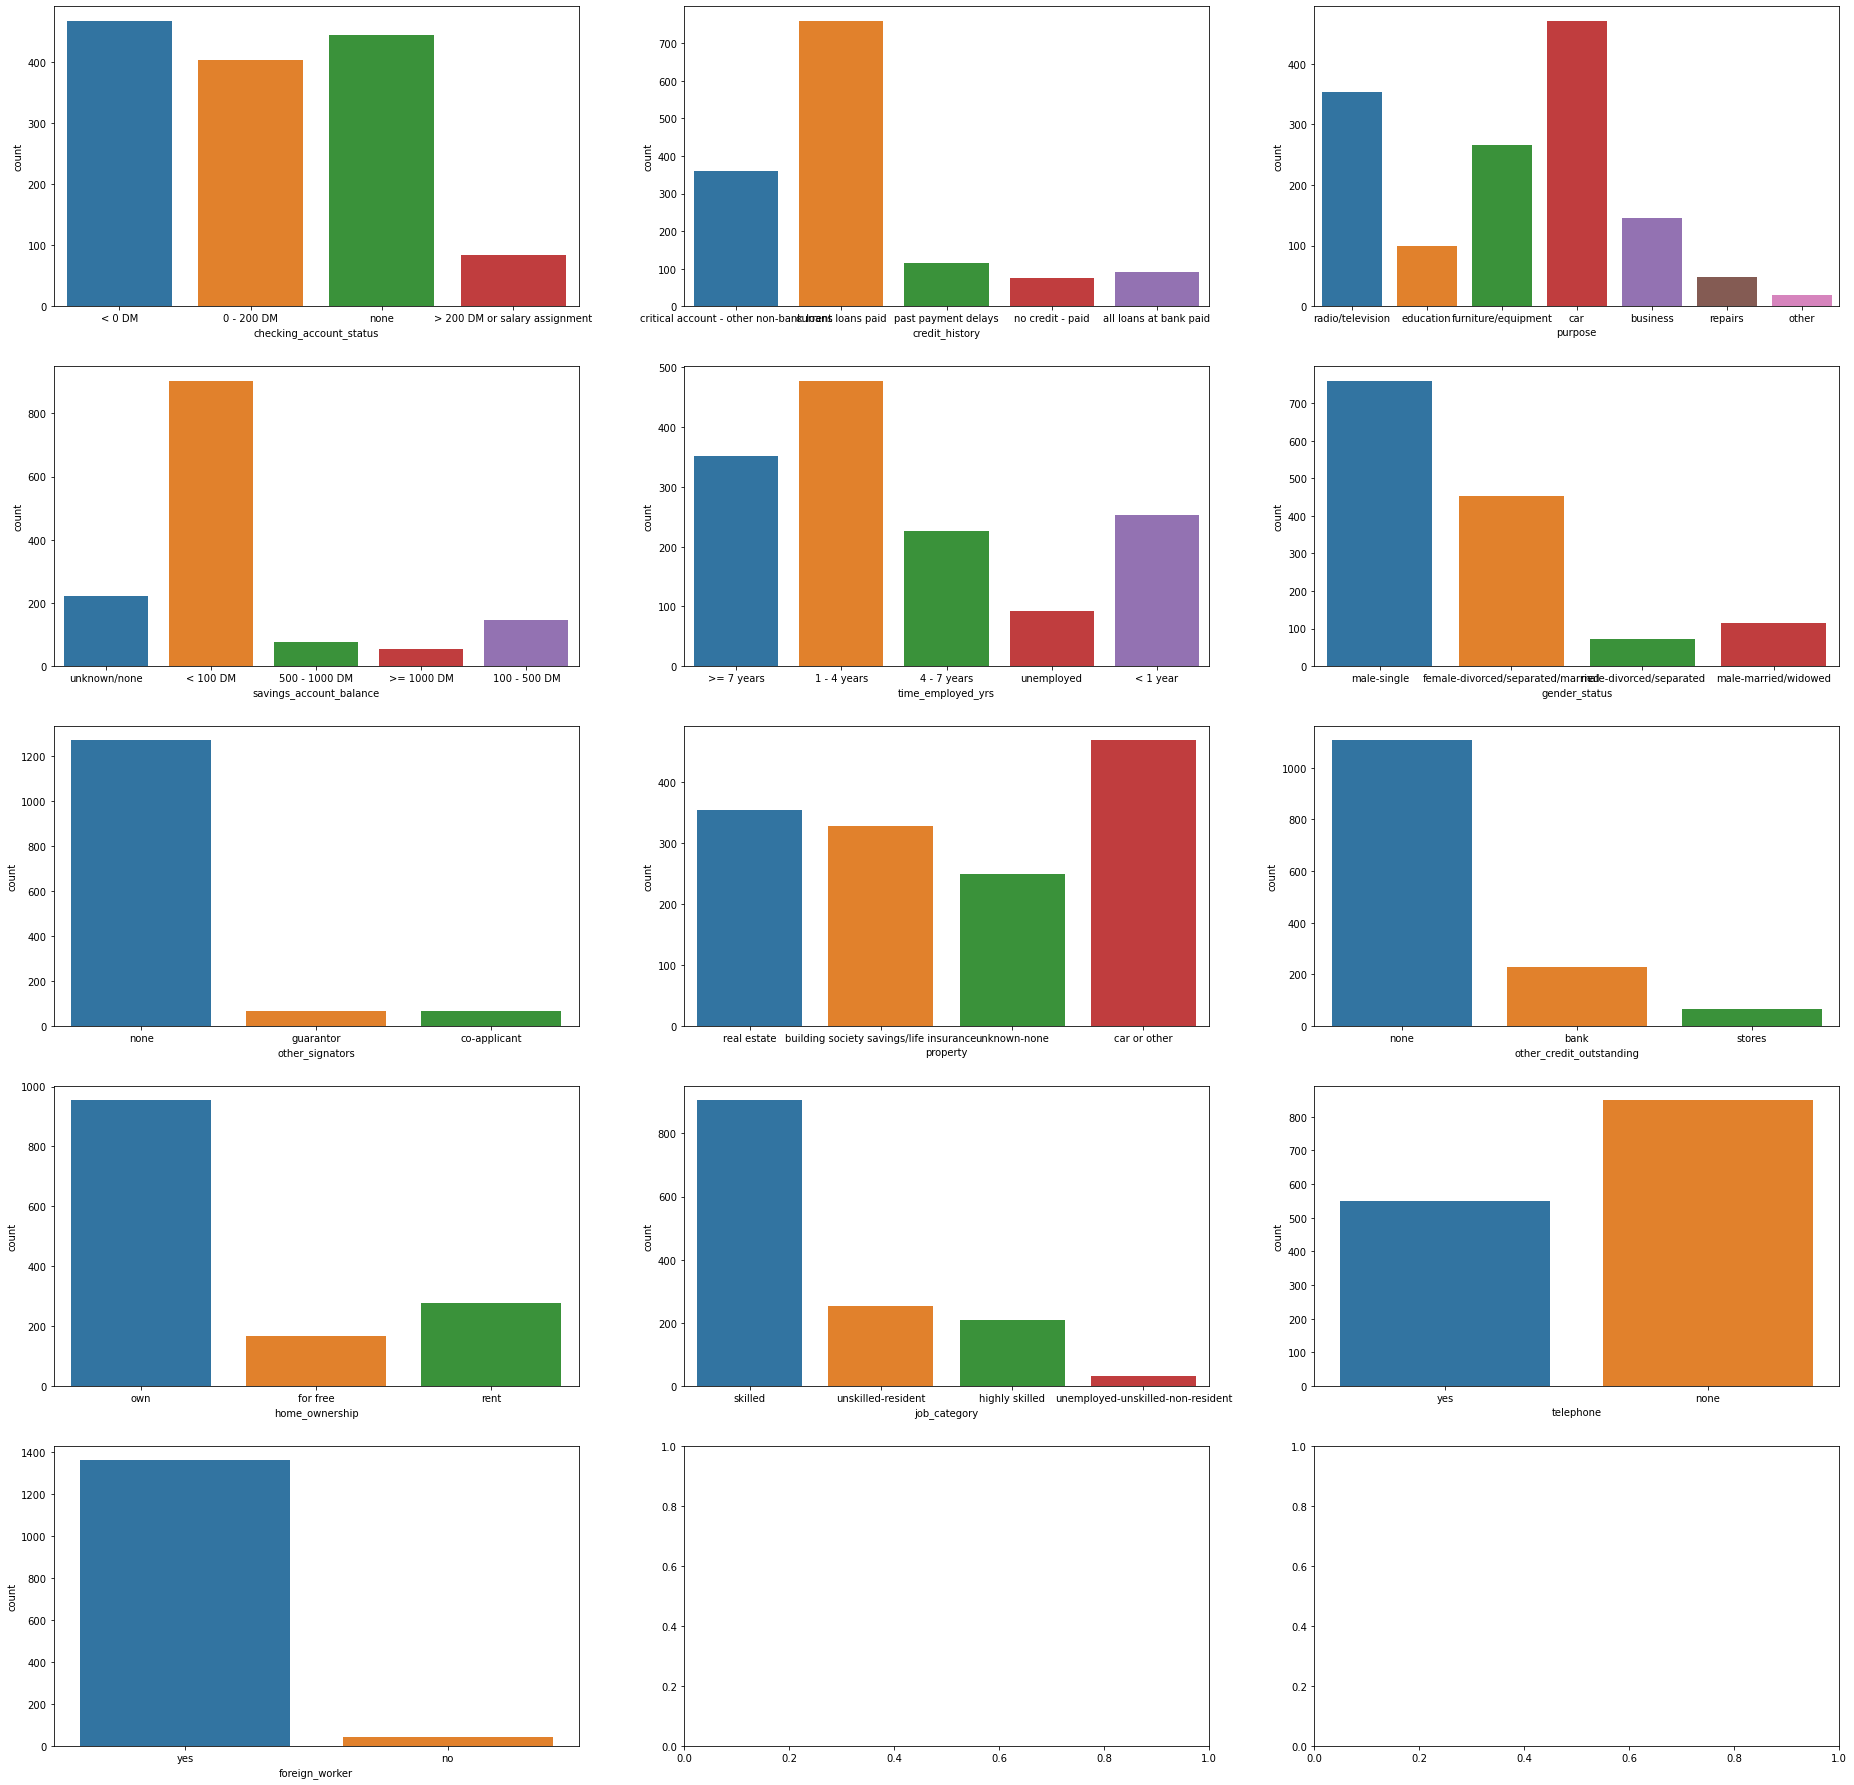

In [96]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(d,catCols, 3, 5, 'c', None, (32,32))

In [97]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== checking_account_status ====================
< 0 DM                           468
none                             444
0 - 200 DM                       404
> 200 DM or salary assignment     84
Name: checking_account_status, dtype: int64

===== credit_history ====================
current loans paid                         760
critical account - other non-bank loans    360
past payment delays                        114
all loans at bank paid                      90
no credit - paid                            76
Name: credit_history, dtype: int64

===== purpose ====================
car                    471
radio/television       353
furniture/equipment    266
business               145
education               99
repairs                 48
other                   18
Name: purpose, dtype: int64

===== savings_account_balance ====================
< 100 DM         904
unknown/none     221
100 - 500 DM     145
500 - 1000 DM     77
>= 1000 DM        53
Name: savings_account_balance, dty

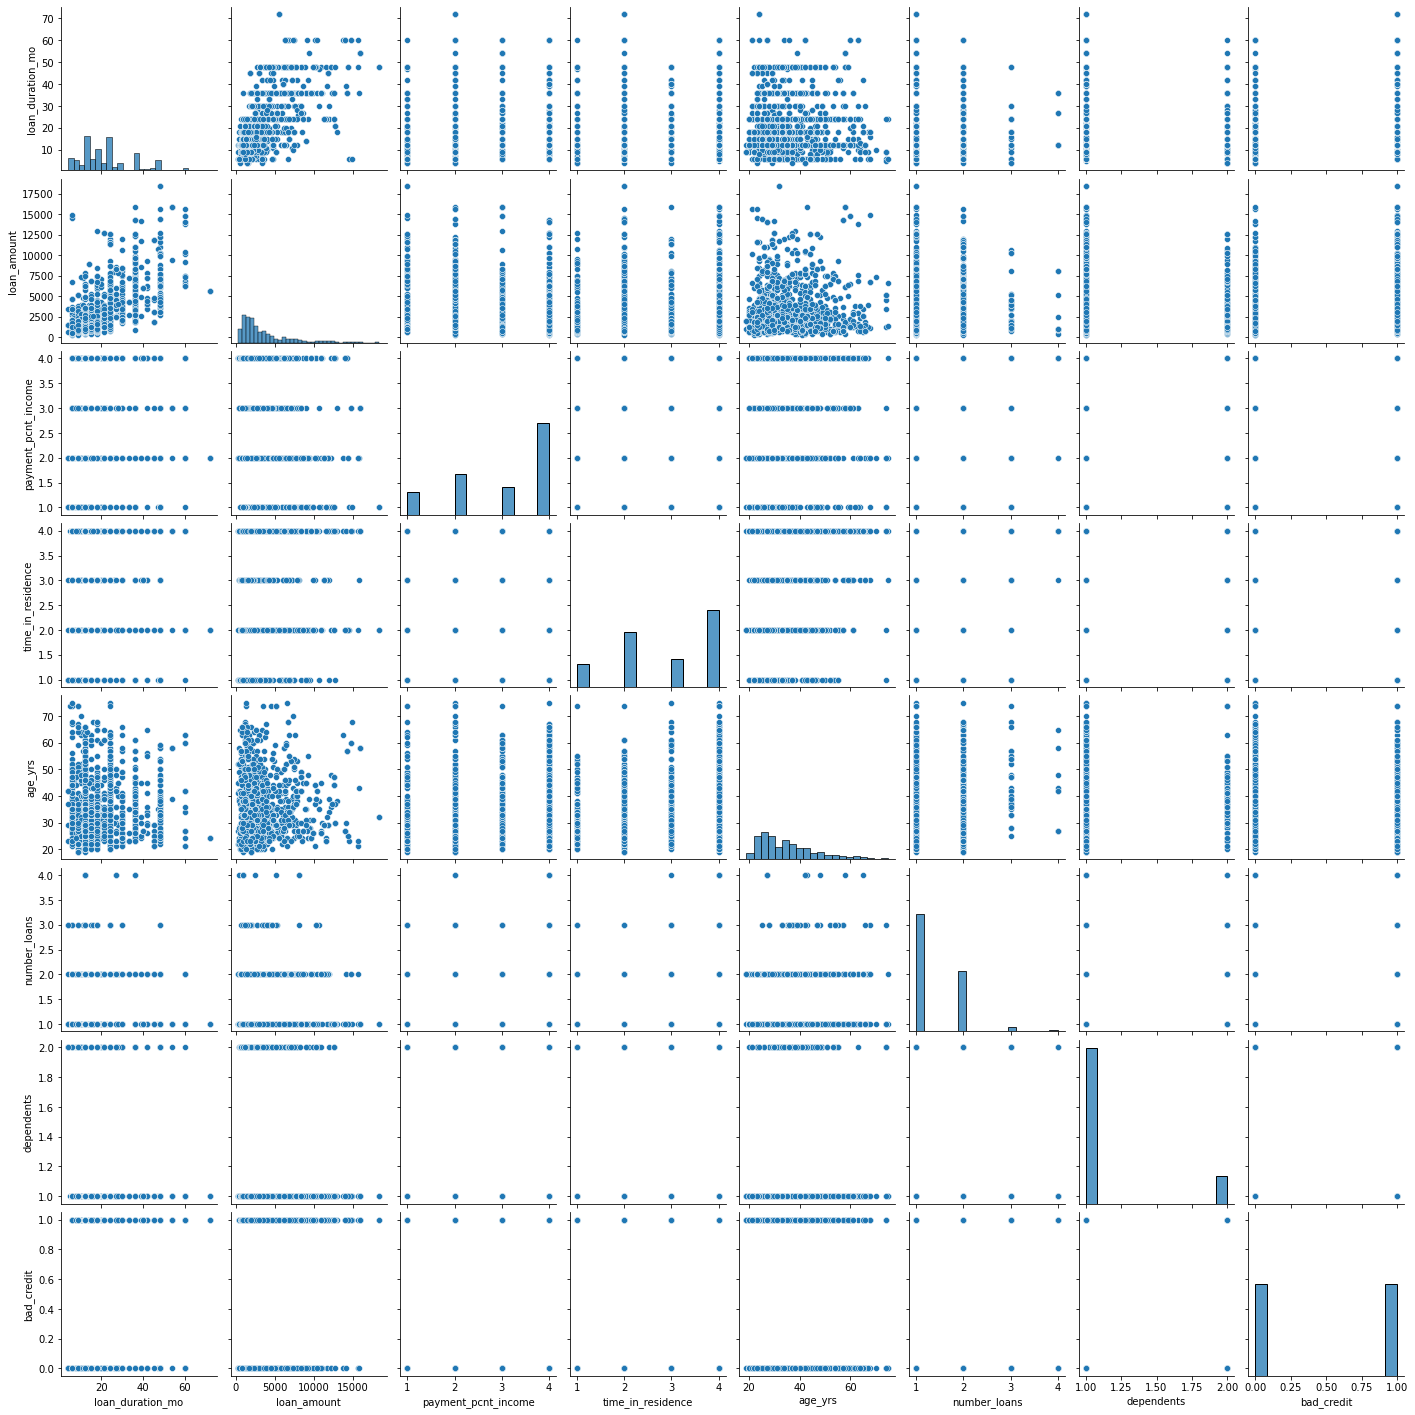

In [98]:
#Visualización de variables numéricas

sns.pairplot(d[numCols])

In [99]:
#Eliminar la variable de salida de la lista de variable numéricas
numCols.remove('bad_credit')

### Variable de salida

In [100]:
# Distriución de la variable de salida

d.groupby('bad_credit').bad_credit.count().sort_values(ascending=False)

bad_credit
0    700
1    700
Name: bad_credit, dtype: int64

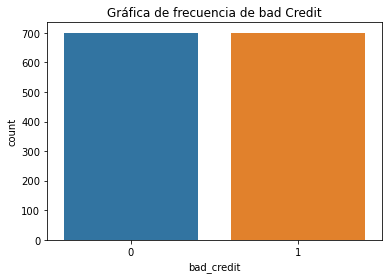

In [101]:
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de bad Credit')
sns.countplot(d.bad_credit)

plt.show()

## 5. Preparación de datos

### Creación de variables Dummies 

In [102]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(d, drop_first=1)

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   loan_duration_mo                                        1400 non-null   int64
 1   loan_amount                                             1400 non-null   int64
 2   payment_pcnt_income                                     1400 non-null   int64
 3   time_in_residence                                       1400 non-null   int64
 4   age_yrs                                                 1400 non-null   int64
 5   number_loans                                            1400 non-null   int64
 6   dependents                                              1400 non-null   int64
 7   bad_credit                                              1400 non-null   int64
 8   checking_account_status_< 0 DM                          14

## 6. Creación del modelo

### Dividir el conjunto de datos

In [103]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='bad_credit')
y = d['bad_credit']

In [104]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Escalar Variables

In [105]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents']


In [106]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
891,0.1618,0.0869,1.0000,1.0000,0.4821,0.3333,0.0000
72,0.0588,0.0503,0.6667,1.0000,0.5714,0.3333,1.0000
613,0.0882,0.0545,0.0000,1.0000,0.5179,0.0000,1.0000
184,0.2500,0.0769,1.0000,0.3333,0.3750,0.3333,1.0000
428,0.2059,0.1392,0.0000,0.6667,0.0357,0.0000,0.0000


### Creación del modelos

#### 6.1 Grid Search basado en out-of-bag score

In [120]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

In [119]:
resultados.head()

,oob_accuracy,criterion,max_depth,max_features,n_estimators
9,0.8750,gini,20.0000,5,150
0,0.8723,gini,NaN,5,150
23,0.8723,entropy,20.0000,9,150
2,0.8723,gini,NaN,9,150
22,0.8714,entropy,20.0000,7,150


### 8.2 Grid Search basado en validación cruzada

In [121]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
14,entropy,None,9,150,0.8491,0.0288,1.0000,0.0000
0,gini,None,5,150,0.8482,0.0217,1.0000,0.0000
9,gini,20,5,150,0.8482,0.0213,1.0000,0.0000
23,entropy,20,9,150,0.8482,0.0271,1.0000,0.0000


In [122]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} : 0.8491071428571428 accuracy


In [34]:
modelo_final = grid.best_estimator_

In [35]:
modelo_final

RandomForestClassifier(max_features=5, n_estimators=150, random_state=123)

In [123]:
# Error de test del modelo final
# ==============================================================================
y_pred = modelo_final.predict(X_test)

#### Evaluación del modelo

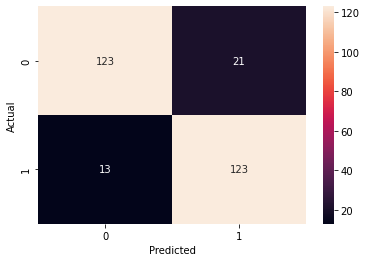

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       144
           1       0.85      0.90      0.88       136

    accuracy                           0.88       280
   macro avg       0.88      0.88      0.88       280
weighted avg       0.88      0.88      0.88       280



In [124]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

### Importancia de predictores

#### Importancia por pureza de nodos

In [53]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,loan_amount,0.1086
0,loan_duration_mo,0.0862
4,age_yrs,0.0855
9,checking_account_status_none,0.0785
2,payment_pcnt_income,0.0416
7,checking_account_status_< 0 DM,0.0380
3,time_in_residence,0.0379
10,credit_history_critical account - other non-ba...,0.0278
36,other_credit_outstanding_none,0.0270
21,savings_account_balance_< 100 DM,0.0252


### Predicción de probabilidades

In [49]:
# Predicción de probabilidades
# ==============================================================================
predicciones = modelo_final.predict_proba(X = X_test)
predicciones[:5, :]

array([[0.06      , 0.94      ],
       [0.7       , 0.3       ],
       [0.87333333, 0.12666667],
       [0.53333333, 0.46666667],
       [0.45333333, 0.54666667]])

In [50]:
# Clasificación empleando la clase de mayor probabilidad
# ==============================================================================
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(5)

,0,1,clasificacion_default_0.5
0,0.0600,0.9400,1
1,0.7000,0.3000,0
2,0.8733,0.1267,0
3,0.5333,0.4667,0
4,0.4533,0.5467,1


In [51]:
# Clasificación final empleando un threshold de 0.8 para la clase 1.
# ==============================================================================
df_predicciones['clasificacion_custom_0.8'] = np.where(df_predicciones['1'] > 0.8, 1, 0)
df_predicciones.iloc[4:10, :]

,0,1,clasificacion_default_0.5,clasificacion_custom_0.8
4,0.4533,0.5467,1,0
5,0.1400,0.8600,1,1
6,0.6200,0.3800,0,0
7,0.7800,0.2200,0,0
8,0.2600,0.7400,1,0
9,0.0333,0.9667,1,1


#### Referencias


- Random Forest
    - https://www.cienciadedatos.net/documentos/py08_random_forest_python.html
    - https://fhernanb.github.io/libro_mod_pred/rand-forests.html
    - https://quantdare.com/decision-trees-gini-vs-entropy/
    